In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [4]:
import pandas as pd
import io
import tarfile
import urllib.request
source = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
col_names = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']
tar = tarfile.open(fileobj=urllib.request.urlopen(source), mode="r|gz")
for member in tar:
    if 'data' in member.name: 
        content = tar.extractfile(member).read()
        data = pd.read_csv(io.BytesIO(content), encoding='utf8', header=None, names=col_names)
print(data)

       longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0        -122.23     37.88              41.0       880.0          129.0   
1        -122.22     37.86              21.0      7099.0         1106.0   
2        -122.24     37.85              52.0      1467.0          190.0   
3        -122.25     37.85              52.0      1274.0          235.0   
4        -122.25     37.85              52.0      1627.0          280.0   
...          ...       ...               ...         ...            ...   
20635    -121.09     39.48              25.0      1665.0          374.0   
20636    -121.21     39.49              18.0       697.0          150.0   
20637    -121.22     39.43              17.0      2254.0          485.0   
20638    -121.32     39.43              18.0      1860.0          409.0   
20639    -121.24     39.37              16.0      2785.0          616.0   

       population  households  medianIncome  medianHouseValue  
0           322.0       126.0      

In [5]:
data.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [6]:
data.columns

Index(['longitude', 'latitude', 'housingMedianAge', 'totalRooms',
       'totalBedrooms', 'population', 'households', 'medianIncome',
       'medianHouseValue'],
      dtype='object')

In [7]:
data.isnull().sum()

longitude           0
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       0
population          0
households          0
medianIncome        0
medianHouseValue    0
dtype: int64

In [8]:
data.info

<bound method DataFrame.info of        longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0        -122.23     37.88              41.0       880.0          129.0   
1        -122.22     37.86              21.0      7099.0         1106.0   
2        -122.24     37.85              52.0      1467.0          190.0   
3        -122.25     37.85              52.0      1274.0          235.0   
4        -122.25     37.85              52.0      1627.0          280.0   
...          ...       ...               ...         ...            ...   
20635    -121.09     39.48              25.0      1665.0          374.0   
20636    -121.21     39.49              18.0       697.0          150.0   
20637    -121.22     39.43              17.0      2254.0          485.0   
20638    -121.32     39.43              18.0      1860.0          409.0   
20639    -121.24     39.37              16.0      2785.0          616.0   

       population  households  medianIncome  medianHouseValue  
0  

In [9]:
data.describe(include="all")

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Correalation Research Methods

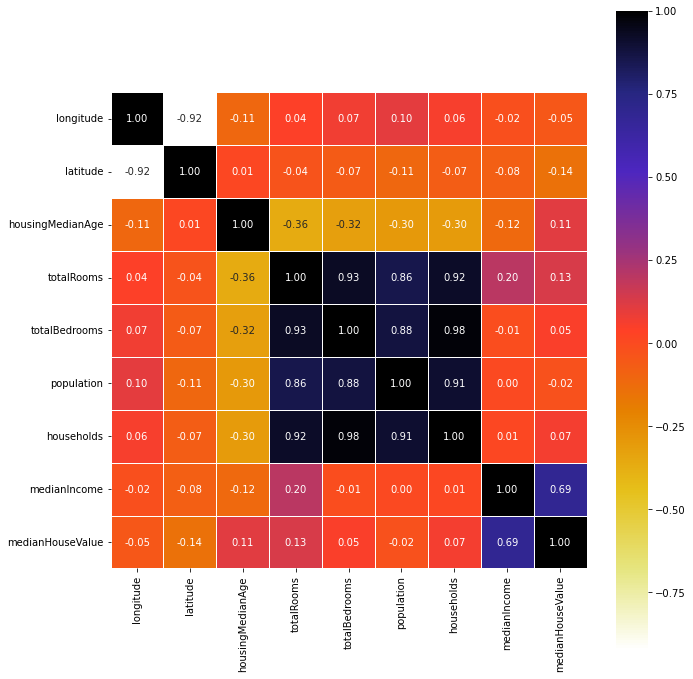

In [10]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data._get_numeric_data().astype(float).corr(),
            square=True, cmap='CMRmap_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

In [11]:
#Null Hypothesis: Value of Median House Income will not show an increase with Median House Value. 

In [12]:
#sample correlaion between the Median House Value and Median House Income
data['medianHouseValue'].corr(data['medianIncome'])

0.6880752079585477

Text(0.5, 1.0, 'medianIncome VS medianHouseValue')

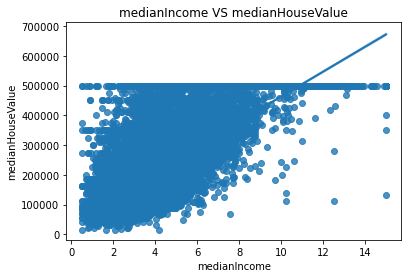

In [13]:
# preform prediction regression 
#Not Scaled just for visual purposes, fit_reg= True)
sns.regplot( x= 'medianIncome' , y= 'medianHouseValue', data=data, fit_reg= True)
plt.title('medianIncome VS medianHouseValue')

In [14]:
#We can reject Null
import scipy
scipy.stats.levene(data['medianIncome'], data['medianHouseValue'], center = 'median')

LeveneResult(statistic=25792.46858695224, pvalue=0.0)

In [15]:
scipy.stats.ttest_ind(data['medianIncome'], data['medianHouseValue'])

Ttest_indResult(statistic=-257.52841120557423, pvalue=0.0)

# Explantory Data Analysis

<AxesSubplot:xlabel='medianHouseValue', ylabel='Density'>

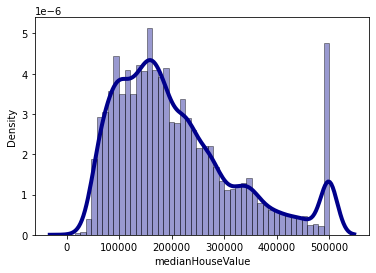

In [16]:
#what is the median range of House Values in the Census?
sns.distplot(data['medianHouseValue'],
hist=True, kde=int(180/5), color='darkblue' , hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

<AxesSubplot:xlabel='medianHouseValue'>

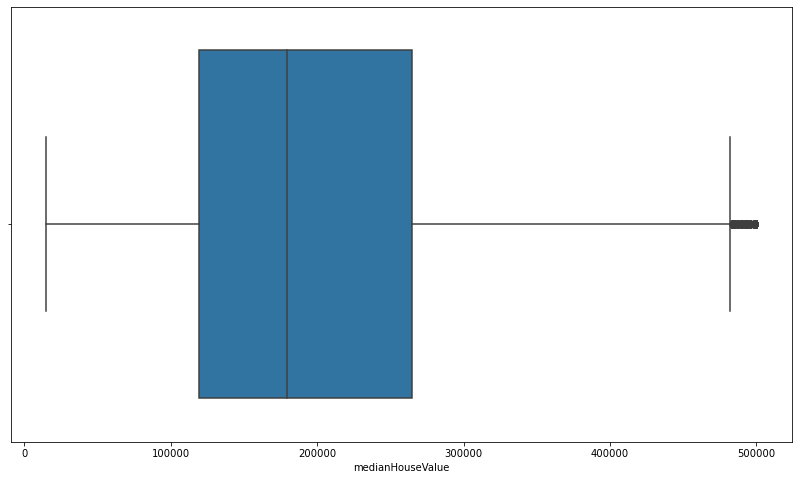

In [41]:
sns.boxplot(x=data['medianHouseValue'], data=data)

In [17]:
#standardize data to visualize
# Get column names first
names = data.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-1.327835,1.052548,0.982143,-0.804819,-0.970706,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.348649,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.825895,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719067,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612239,-0.759847,-0.629157,-0.012881,1.172900


<AxesSubplot:xlabel='medianIncome', ylabel='medianHouseValue'>

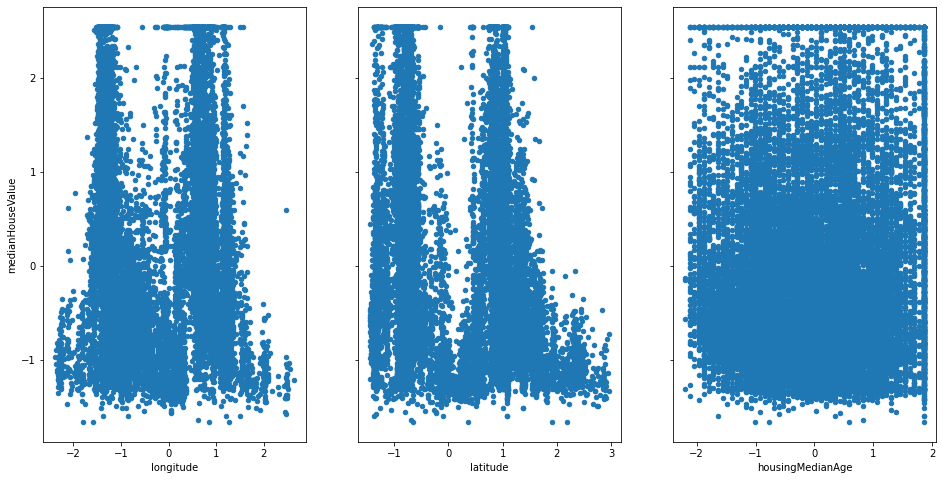

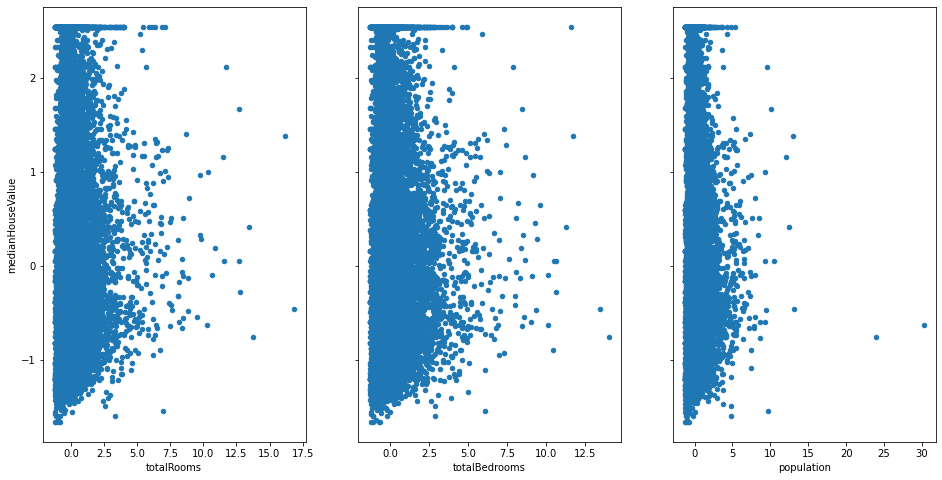

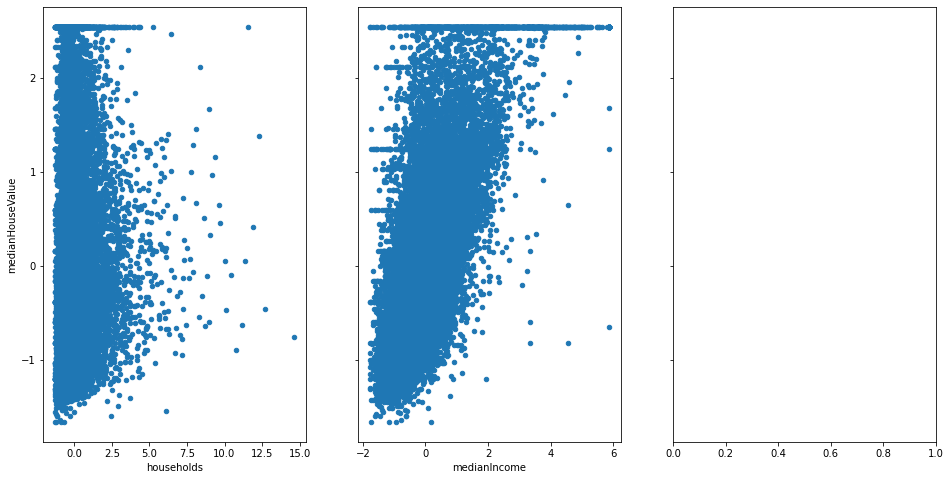

In [18]:
#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='longitude',y='medianHouseValue',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='latitude',y='medianHouseValue',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='housingMedianAge',y='medianHouseValue',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='totalRooms',y='medianHouseValue',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='totalBedrooms',y='medianHouseValue',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='population',y='medianHouseValue',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='households',y='medianHouseValue',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='medianIncome',y='medianHouseValue',ax=axs[1],figsize=(16,8))

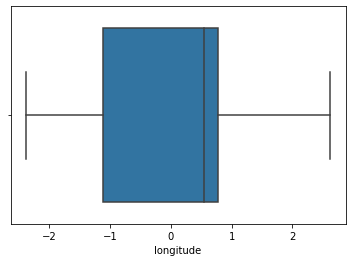

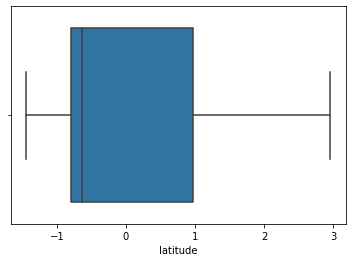

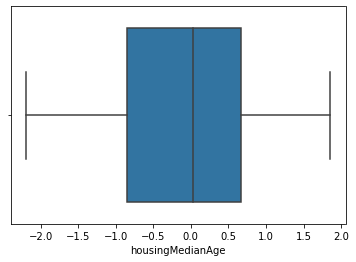

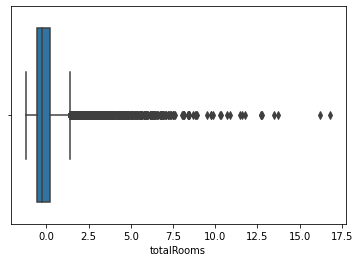

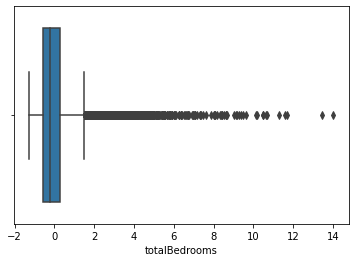

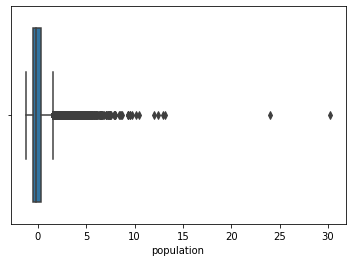

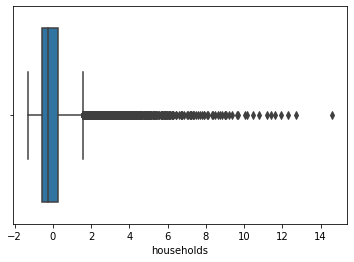

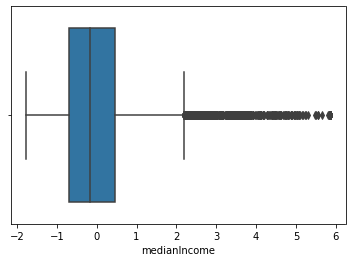

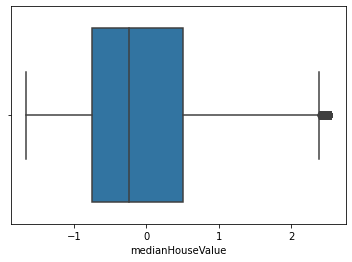

In [19]:
for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housingMedianAge'}>],
       [<AxesSubplot:title={'center':'totalRooms'}>,
        <AxesSubplot:title={'center':'totalBedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'medianIncome'}>,
        <AxesSubplot:title={'center':'medianHouseValue'}>]], dtype=object)

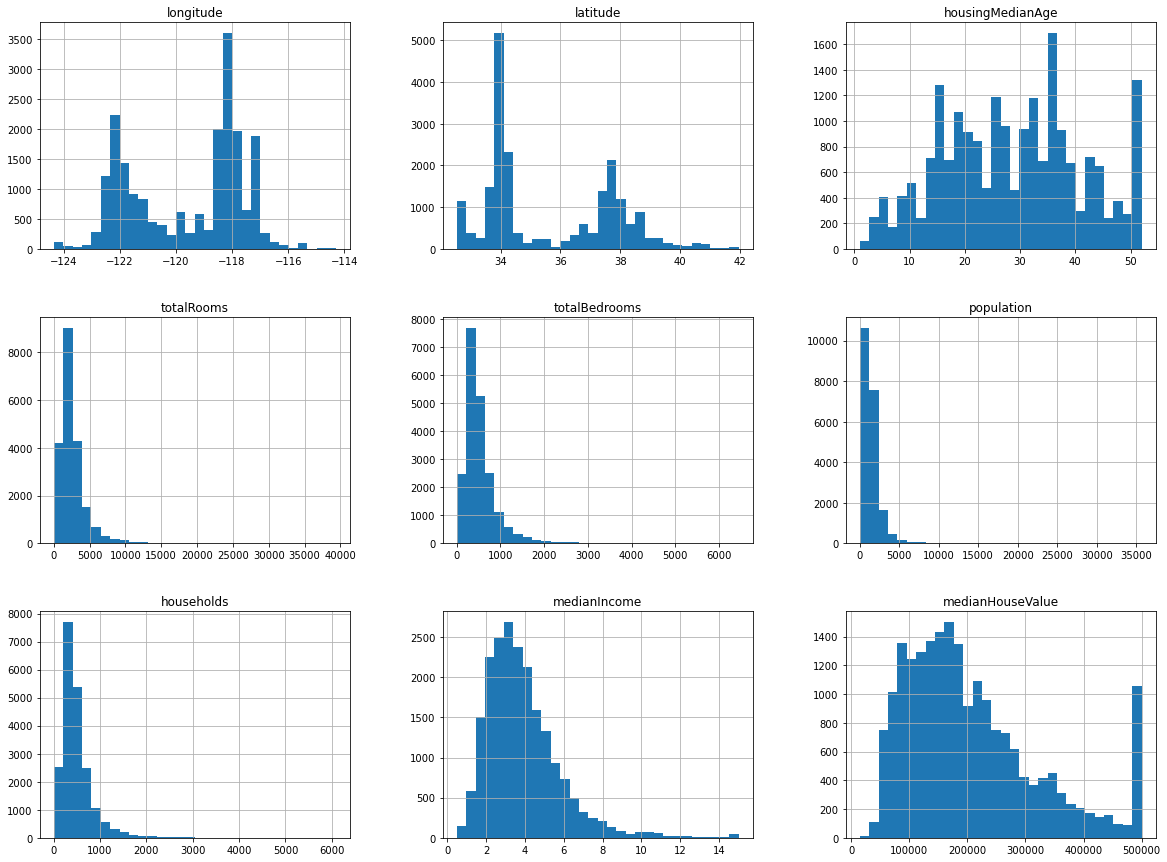

In [20]:
 data.hist(bins = 30, figsize=(20, 15))

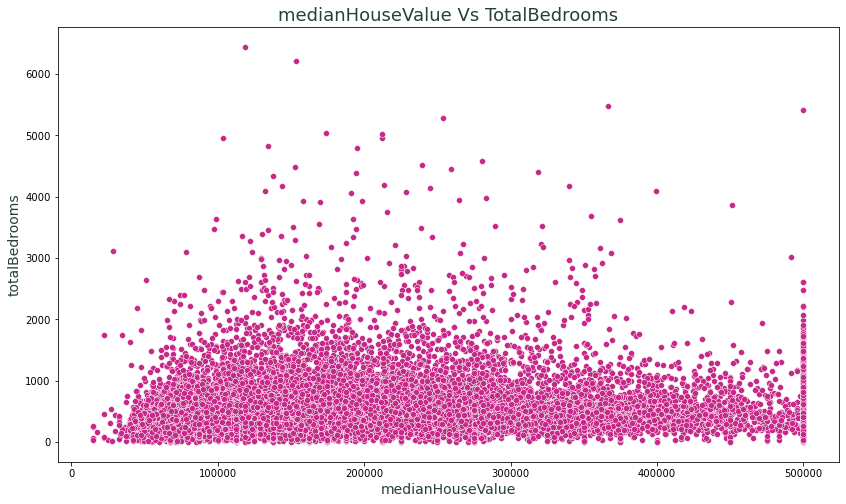

In [21]:
plt.rcParams["figure.figsize"] = (14,8)
sns.scatterplot(data = data, x = 'medianHouseValue', y = 'totalBedrooms', color='#C62A88', legend=False)
plt.xlabel('medianHouseValue',fontsize=14,color="#26413C")
plt.ylabel('totalBedrooms',fontsize=14,color="#26413C")
plt.title('medianHouseValue Vs TotalBedrooms',fontsize=18,color="#26413C")
plt.show()

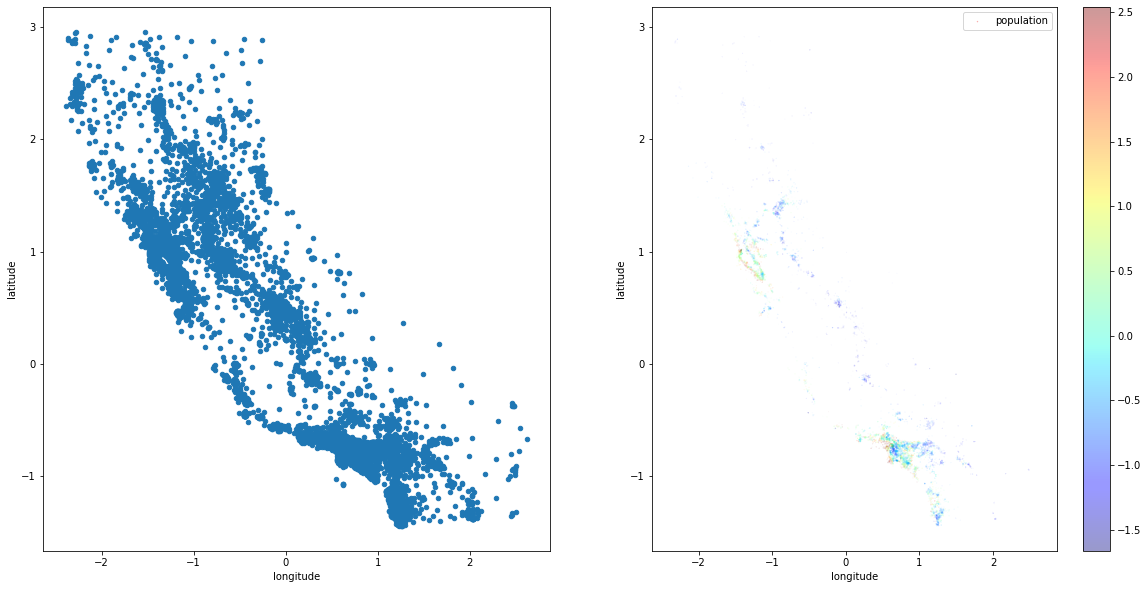

In [22]:
fig, axarr = plt.subplots(1, 2,figsize=(20,10))
scaled_df.plot(kind='scatter',x='longitude',y='latitude',ax=axarr[0])
scaled_df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=scaled_df['population']/100,label='population',c=scaled_df.medianHouseValue,cmap=plt.get_cmap('jet'),colorbar=True,ax=axarr[1])
plt.legend()

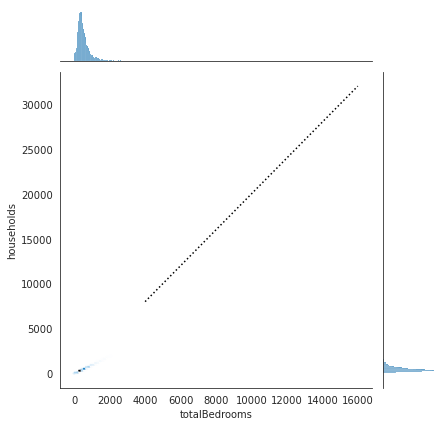

In [23]:
with sns.axes_style('white'):
    g = sns.jointplot("totalBedrooms", "households", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

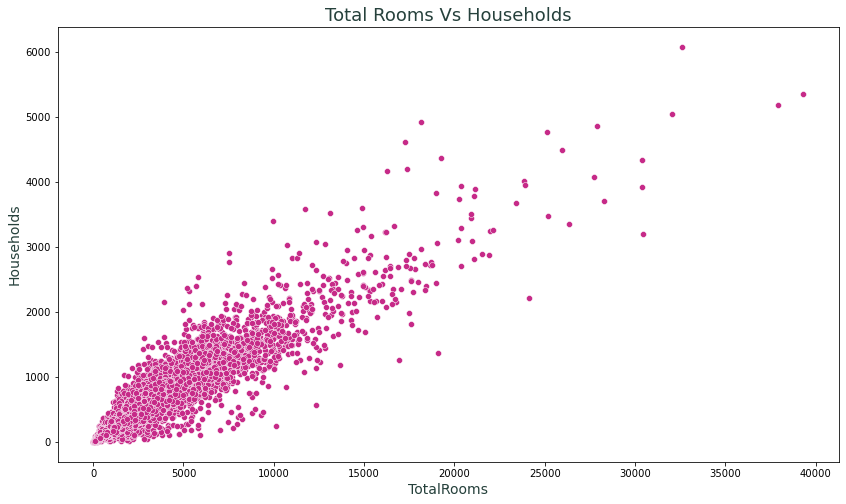

In [24]:
plt.rcParams["figure.figsize"] = (14,8)
sns.scatterplot(data = data, x = 'totalRooms', y = 'households', color='#C62A88', legend=False)
plt.xlabel('TotalRooms',fontsize=14,color="#26413C")
plt.ylabel('Households',fontsize=14,color="#26413C")
plt.title('Total Rooms Vs Households',fontsize=18,color="#26413C")
plt.show()

<AxesSubplot:xlabel='population', ylabel='Density'>

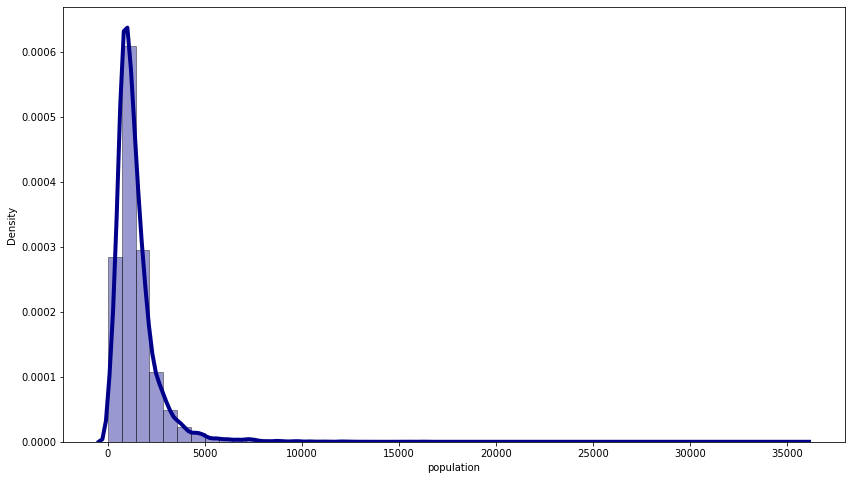

In [25]:
sns.distplot(data['population'],
hist=True, kde=int(180/5), color='darkblue' , hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

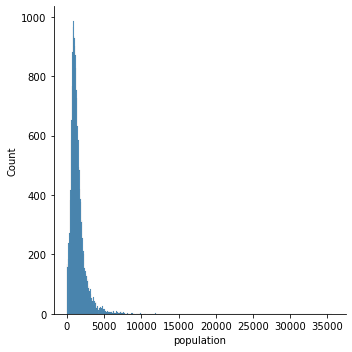

In [39]:
sns.displot(data['population'])

Text(0, 0.5, 'Amount')

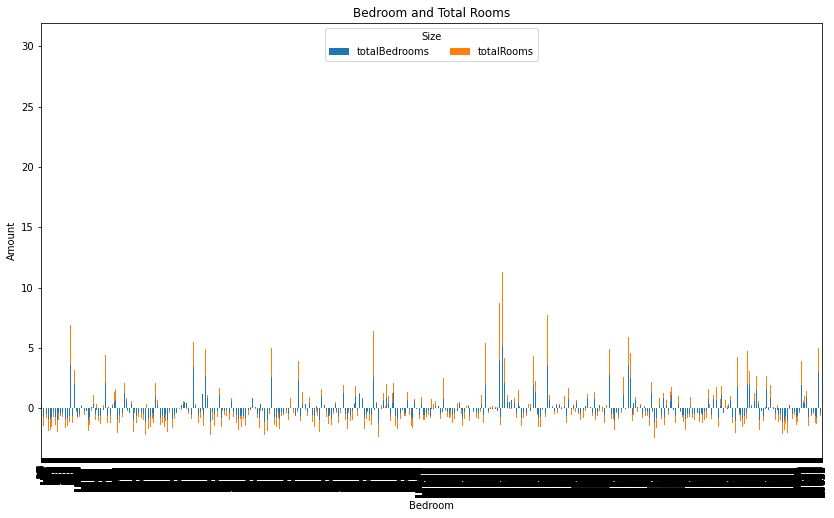

In [33]:
scaled_df[["totalBedrooms", "totalRooms"]].plot(
    kind="bar", stacked=True
).legend(
    loc='upper center', ncol=2, title="Size"
)
plt.title("Bedroom and Total Rooms")
plt.xlabel("Bedroom")
plt.ylabel("Amount")

<AxesSubplot:>

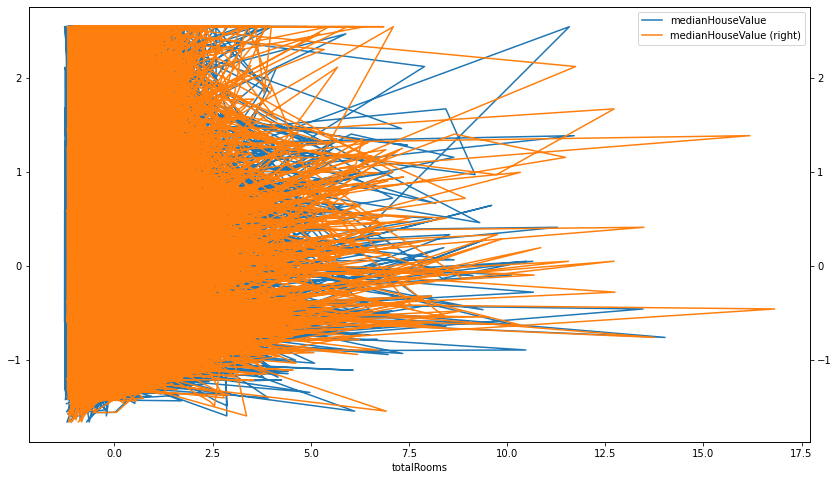

In [35]:
fig, ax = plt.subplots()
scaled_df.plot(x = 'totalBedrooms', y = 'medianHouseValue', ax = ax) 
scaled_df.plot(x = 'totalRooms', y = 'medianHouseValue', ax = ax, secondary_y = True) 

Text(0.5, 1.0, 'Median Age of Housing')

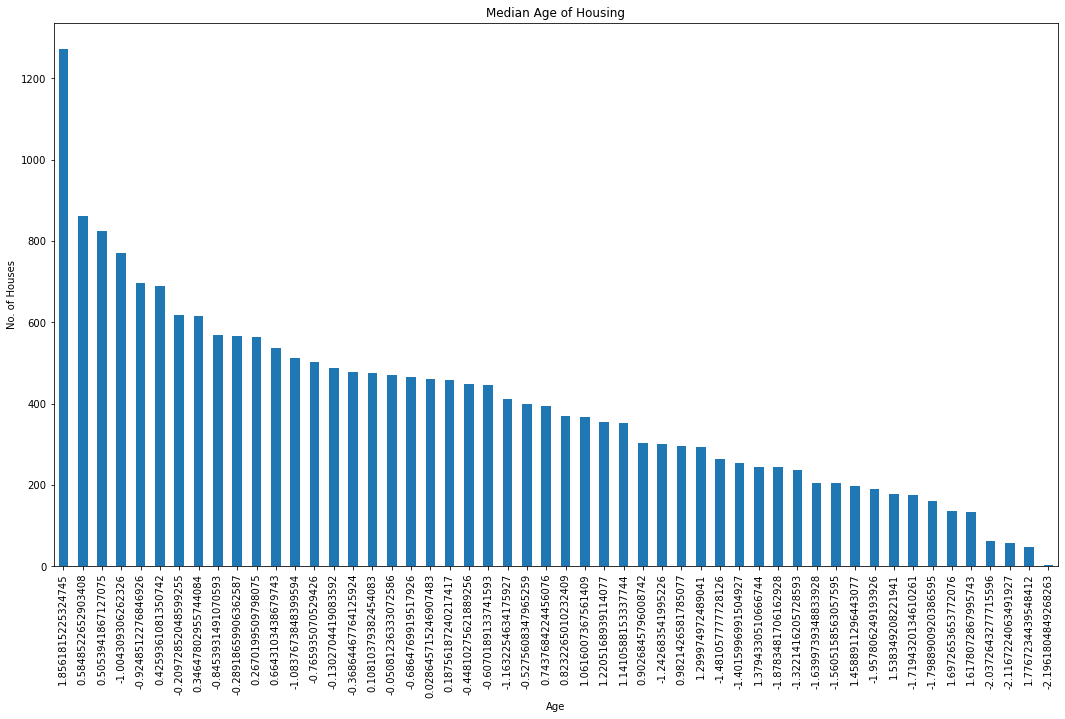

In [43]:
plt.figure(figsize=(18,10))
scaled_df['housingMedianAge'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("No. of Houses")
plt.title("Median Age of Housing")

(-1.120334176762862,
 1.1009682941315648,
 -1.120334176762862,
 1.1009682941315648)

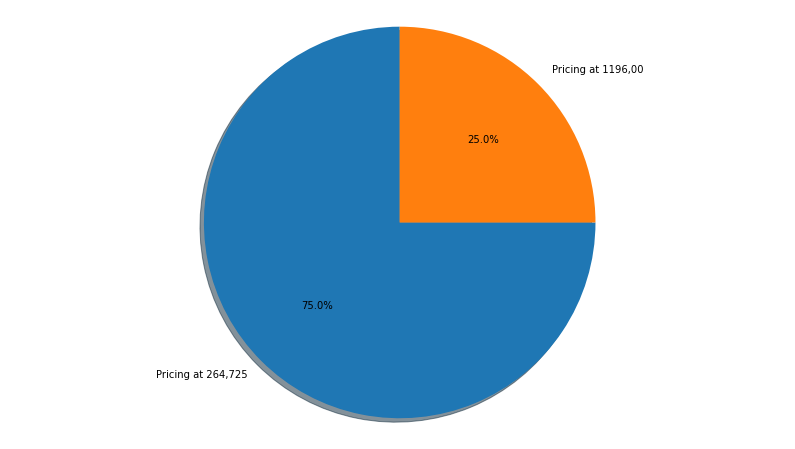

In [84]:
labels = 'Pricing at 264,725' , 'Pricing at 1196,00 '
sizes = ['75', '25',]
explode = (0, 0, )  # only "explode" the 2nd slice (i.e. 'Max price housing')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

In [47]:
#X/Y Features

X_Features=['longitude', 'latitude', 'housingMedianAge', 'totalRooms',
       'totalBedrooms', 'population', 'households', 'medianIncome',]
X=scaled_df[X_Features]
Y=scaled_df['medianHouseValue']

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [50]:
print(data.shape)
print(X.shape)
print(Y.shape)

(20640, 9)
(20640, 8)
(20640,)


In [51]:
#split DataSet
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [57]:
#Linear Regression Preformance

linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [58]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [59]:
y_predict = linreg.predict(x_test)

In [60]:
#Print root mean squared error (RMSE) from Linear Regression.
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.6050726968566097
0.6283439535787276


In [64]:
#Linear Regression on only Median Value based on Median Income 
#Median income Value-had correaltion prediction
x_train_Income=x_train[['medianIncome']]
x_test_Income=x_test[['medianIncome']]

In [65]:
print(x_train_Income.shape)
print(y_train.shape)

(16512, 1)
(16512,)


In [66]:
linreg=LinearRegression()
linreg.fit(x_train_Income,y_train)
y_predict = linreg.predict(x_test_Income)

In [67]:
#print intercept and coefficient of the linear equation
print(linreg.intercept_, linreg.coef_)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.005623019866893163 [0.69238221]
0.7212595914243148
0.47190835934467734


In [ ]:
#The median income increases by the Median Home Value by 69% 

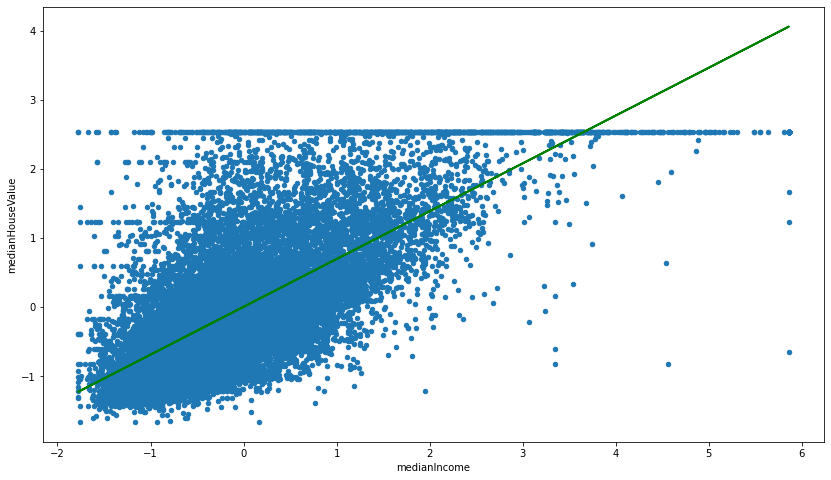

In [71]:
scaled_df.plot(kind='scatter',x='medianIncome',y='medianHouseValue')
plt.plot(x_test_Income,y_predict,C="green",linewidth=2)